In [58]:
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import json
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
from IPython.display import Image
%matplotlib inline

#Lab 9

##Crippling of a C-shaped specimen

Plastic relation:

In [59]:
ϵ = np.array([0,0.34,0.86,1.63,2.79,4.53,7.14,11.06,16.93,25.74,38.96,58.77,88.50,133.10,200.0])
σ = np.array([311, 316,324,335,348,365,383,401,418,434,455,485,529,596,696])

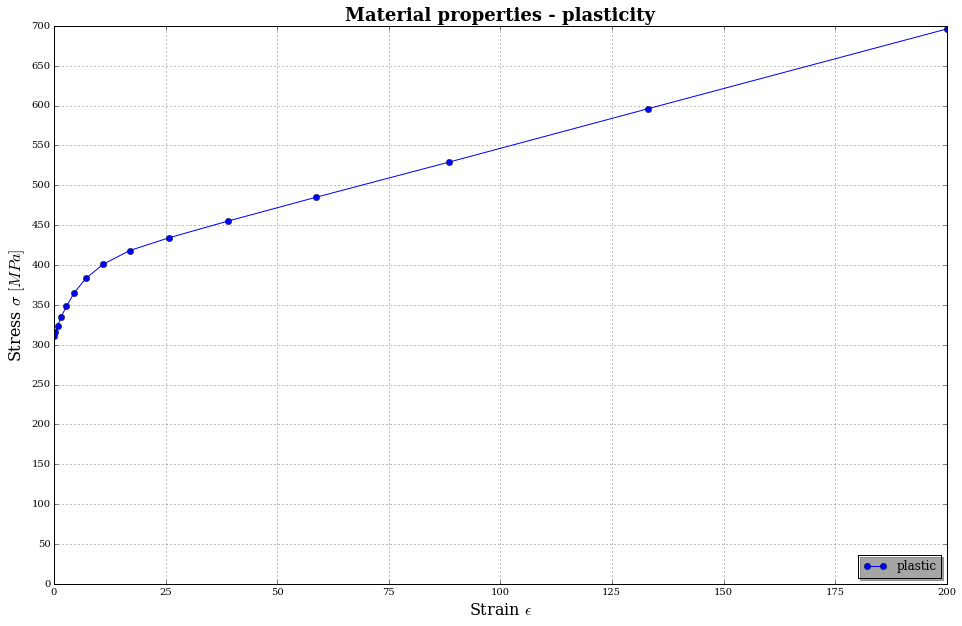

In [60]:
plt.figure(figsize=(16,10), dpi=300)
plt.plot(ϵ,σ, 'o-', label='plastic')
plt.xticks(np.arange(0.0,201,25))
plt.yticks(np.arange(0.0,700.5,50))
plt.title('Material properties - plasticity',fontsize=18, fontweight='bold')
plt.xlabel('Strain $\epsilon$', fontsize=16)
plt.ylabel('Stress $\sigma$ $[MPa]$', fontsize=16)
plt.legend(loc='lower right', shadow=True)
plt.grid()

Read data from results file

In [61]:
def readDataL09(filename):
    
    file=open(filename,'r') 
    row = file.readlines()
    
    disp = [0]
    force = [0]
    act_force = 0.0
    node_count = 0
    
    nodes = [3,   4,   6,   8,  63,  64,  65,  66,  67, 182, 183, 184, 185, 186, 187, \
             188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 252, 253, 254, 255, 256]
    state = 0

    for line in row:
        strlist = line.split()
        if 'U3' in strlist and state == 0:
            state = 1
        elif len(strlist) == 7 and state == 1 and strlist[0] == '3':
            disp.append(float(strlist[3]))
            state = 2
        elif 'RF3' in strlist and state == 2:
            state = 3
        elif len(strlist) == 7 and state == 3  and int(strlist[0]) in nodes:
            act_force += float(strlist[3])
            node_count += 1
            
            if node_count == len(nodes):
                state = 0
                force.append(act_force)
                node_count = 0
                act_force = 0.0
                state = 0

    da = np.array(disp)
    fa = np.array(force)
    
    return da, fa


In [62]:
d1, f1 = readDataL09('../Lab09_abaqus/09_Template_Crippling.dat')

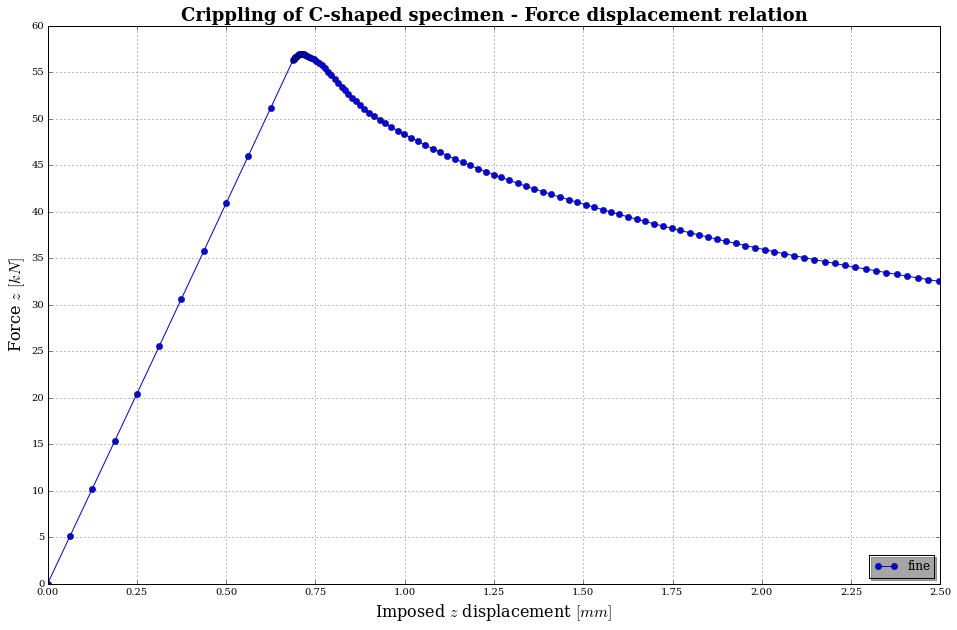

In [65]:
maxD = 2.5
maxF = 60.
plt.figure(figsize=(16,10), dpi=300)

plt.plot(d1,f1/1000., 'o-', label='fine')
#plt.plot(d2,f2*4, '^-', ms=12, label='coarse')
#plt.plot(d3,f3*4, 'h-', ms=12, label='coarse 2')

plt.xlim([0,maxD])
plt.ylim([0,maxF])
plt.xticks(np.arange(0.0,maxD+.1,.25))
plt.yticks(np.arange(0.0,maxF+.5,5))
plt.title('Crippling of C-shaped specimen - Force displacement relation',fontsize=18, fontweight='bold')
plt.xlabel('Imposed $z$ displacement $[mm]$', fontsize=16)
plt.ylabel('Force $z$ $[kN]$', fontsize=16)
plt.legend(loc='lower right', shadow=True)
plt.grid()
plt.savefig('Lab09.jpg')

#Maximum force

In [71]:
max_i = np.argmax(f1)
max_F = f1[max_i]/1000
max_d = d1[max_i]
print("Maximum compression load: {0:.2f} kN at {1:.3f} mm of displacement".format(max_F, max_d))

Maximum compression load: 56.98 kN at 0.713 mm of displacement


## z displacement

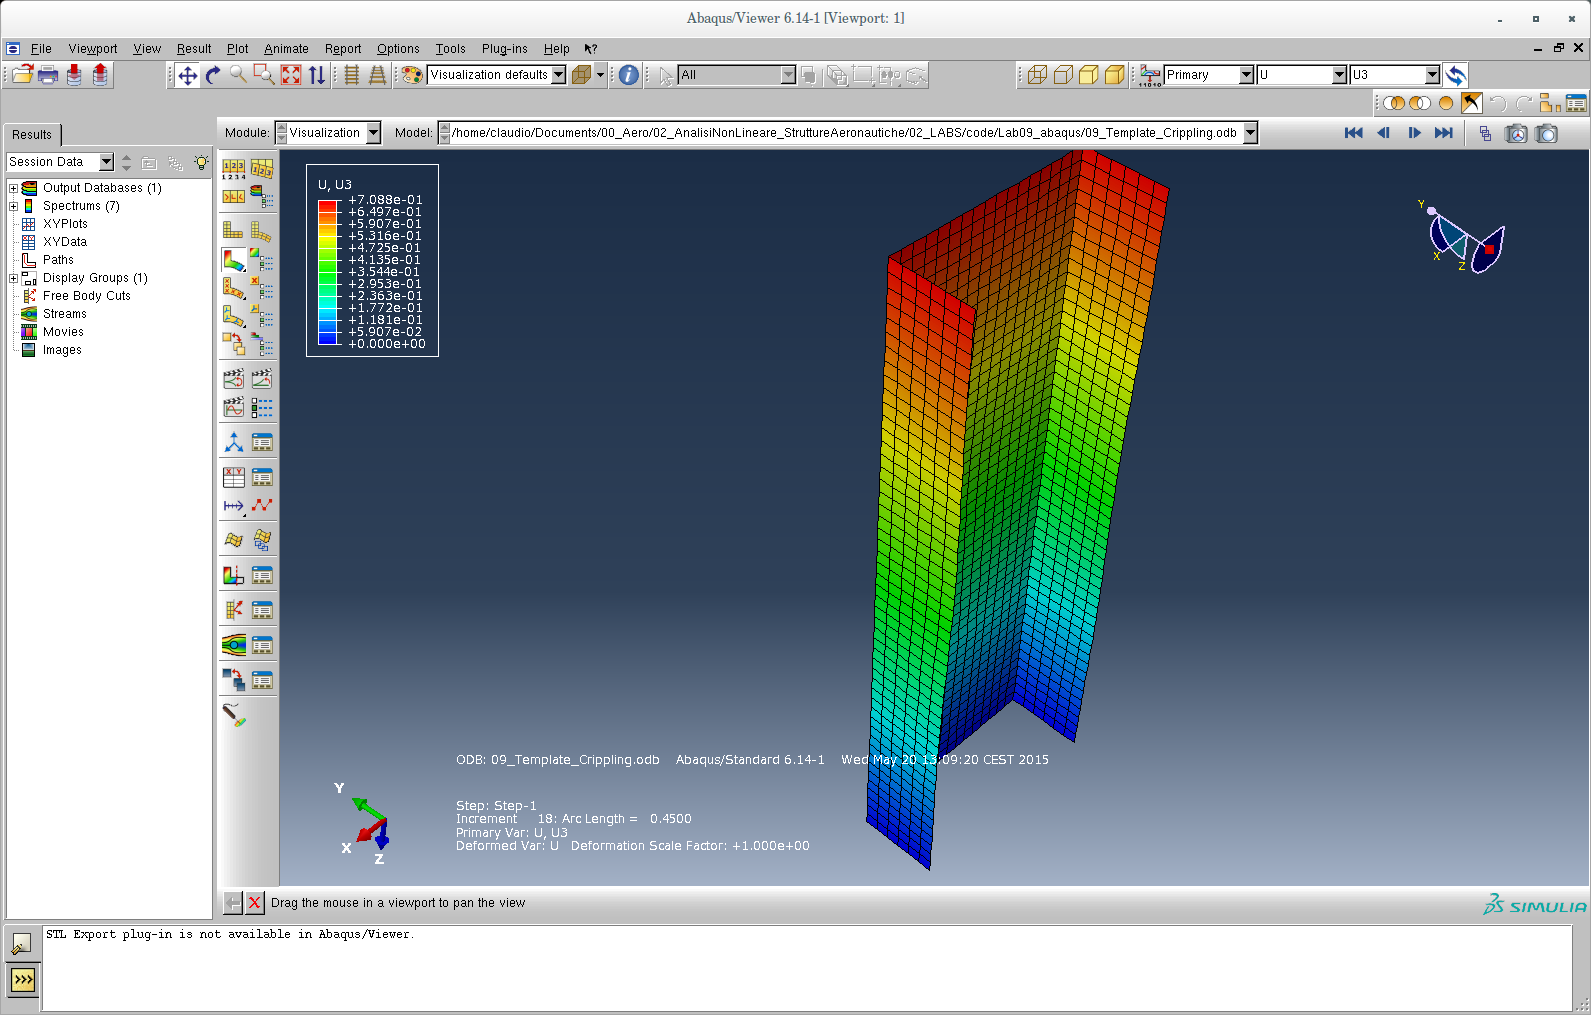

In [74]:
Image(filename='../Lab09_abaqus/z_disp_el.png')

## Von Mises Stress

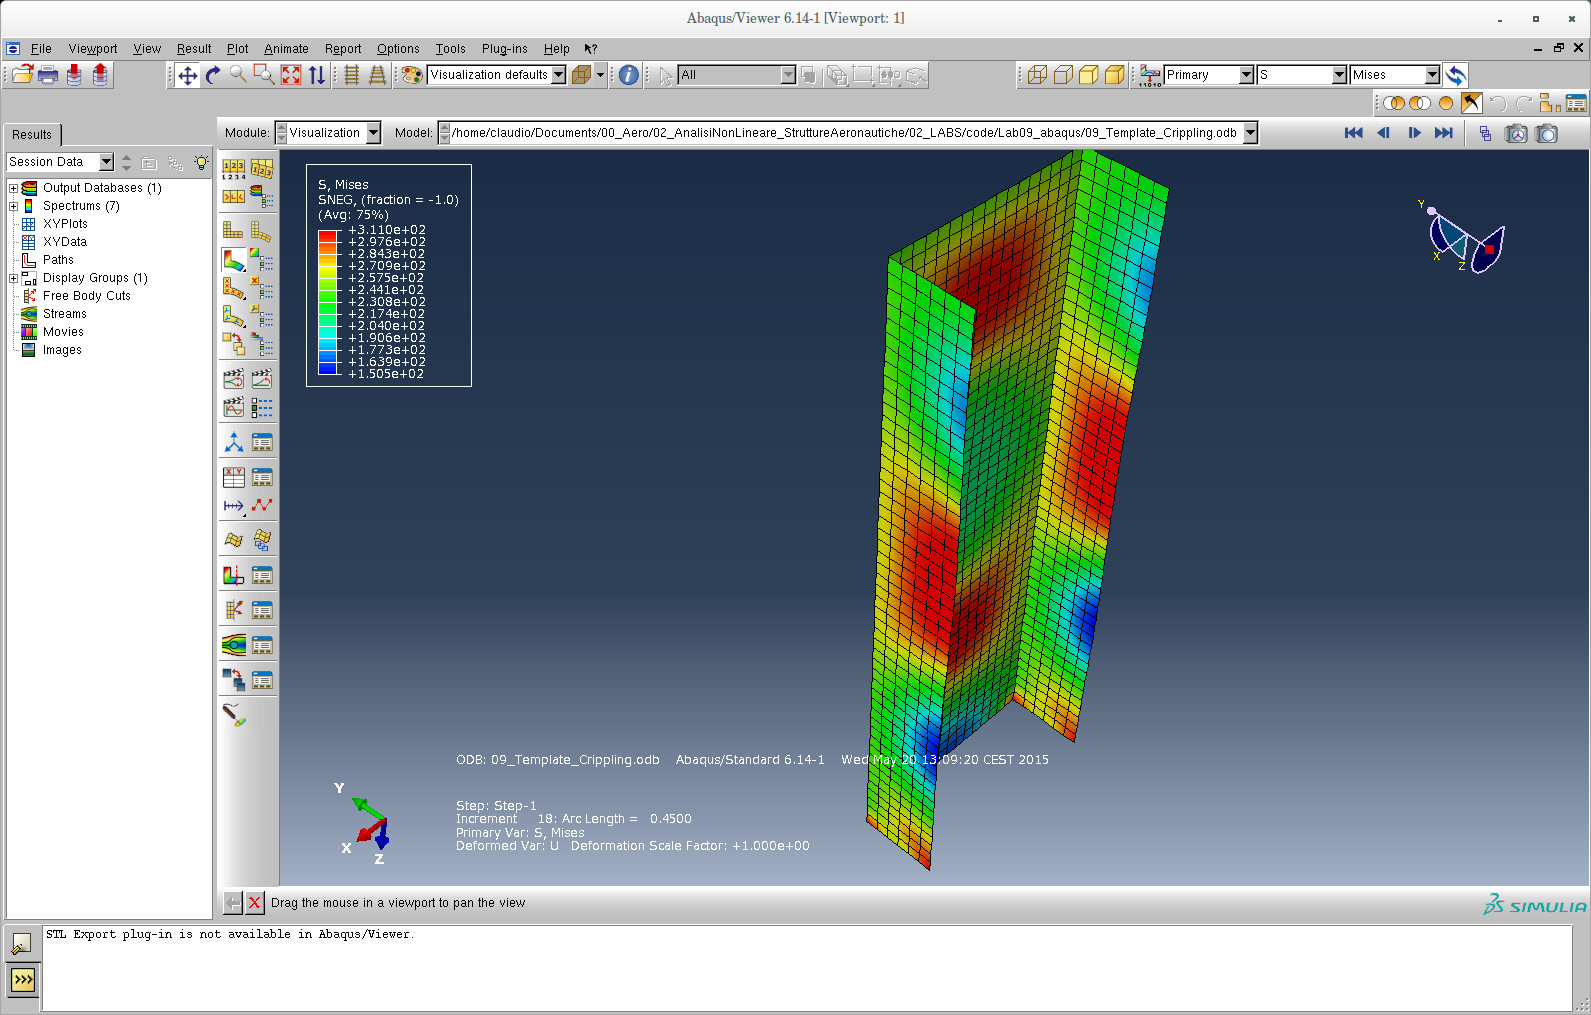

In [73]:
Image(filename='../Lab09_abaqus/vm_stress_el.png')

# State @2.5mm displacement

##z displacement

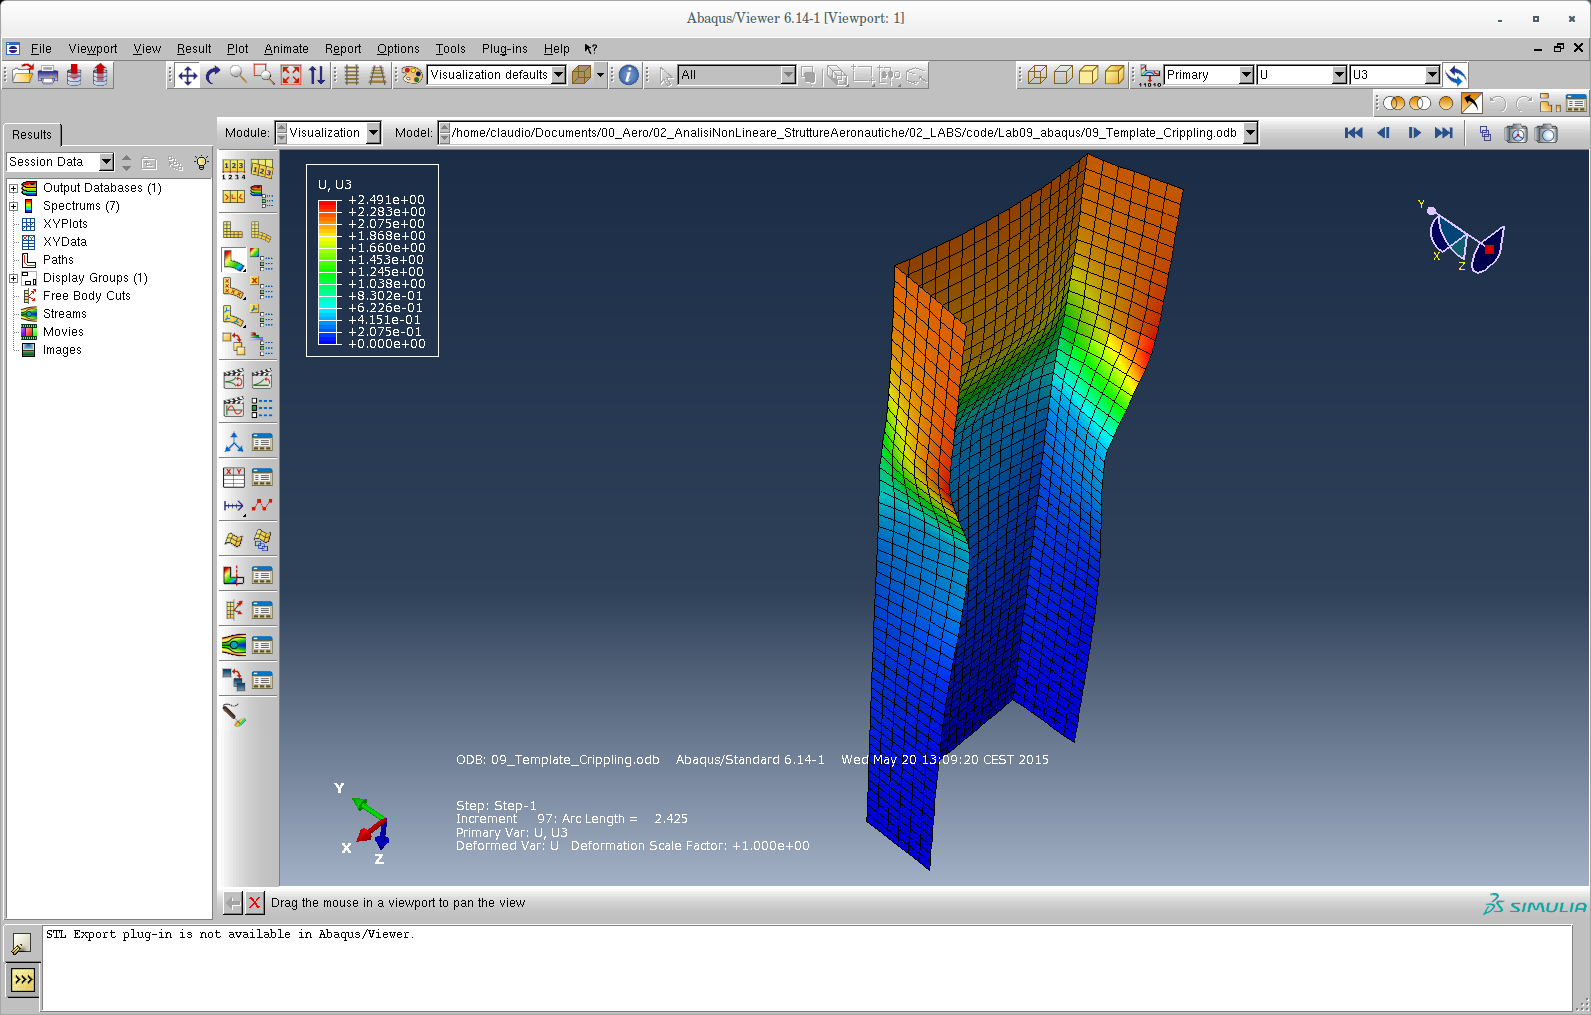

In [75]:
Image(filename='../Lab09_abaqus/z_disp_term.png')

##Von Mises Stress

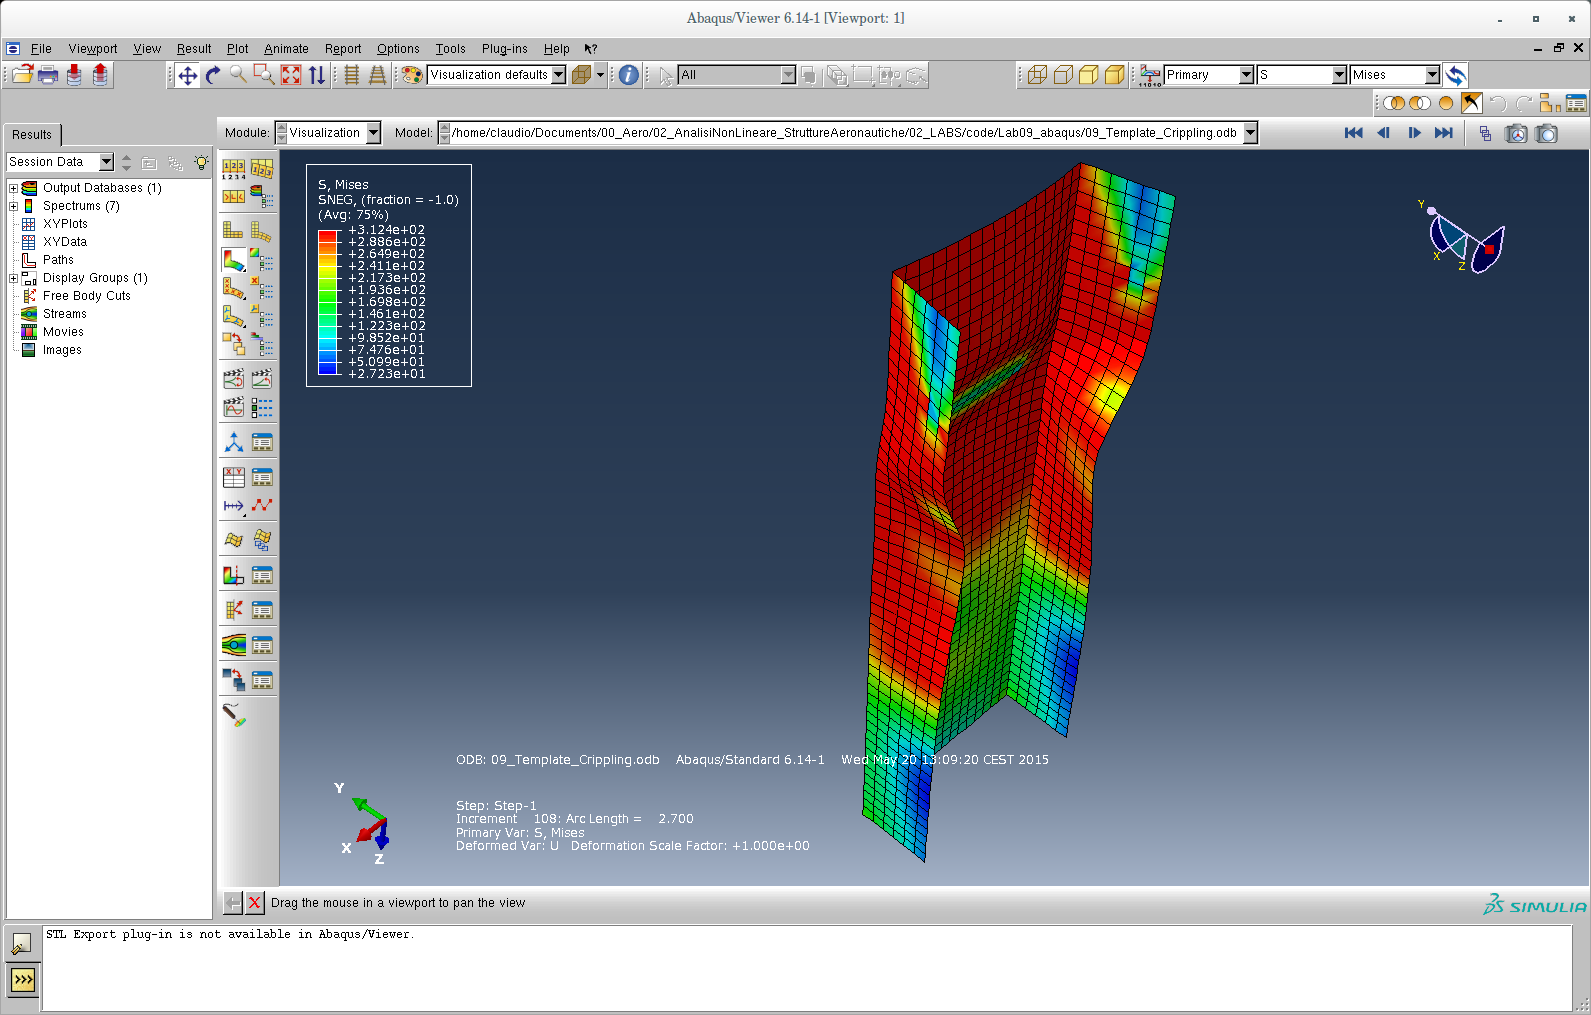

In [76]:
Image(filename='../Lab09_abaqus/vm_stress_term.png')